# Q1 - Ai assignment

In [32]:
#using BFS
from collections import deque


romania_map = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Eforie': {'Hirsova': 86},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Giurgiu': {'Bucharest': 90},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Neamt': {'Iasi': 87},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Pitesti': 97},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Vaslui': {'Iasi': 92, 'Urziceni': 142},
    'Zerind': {'Arad': 75, 'Oradea': 71}
}

def bfs_all_paths_with_cost(graph, start, goal):
    # Queue to store the paths along with their costs
    queue = deque([([start], 0)])
    all_paths_with_costs = []

    while queue:
        # Get the first path and its cost from the queue
        path, cost = queue.popleft()
        # Get the last node from the path
        node = path[-1]

        # Goal check, add path and its cost to all_paths_with_costs list
        if node == goal:
            all_paths_with_costs.append((path, cost))
            continue

        # Add neighbors to the queue
        for neighbor, neighbor_cost in graph[node].items():
            if neighbor not in path:  # Check to prevent cycles
                new_path = list(path)
                new_path.append(neighbor)
                new_cost = cost + neighbor_cost
                queue.append((new_path, new_cost))


    best_path_with_cost = min(all_paths_with_costs, key=lambda x: x[1], default=(None, float('inf')))

    return all_paths_with_costs, best_path_with_cost


start_city = input("Enter Starting node: ")
goal_city = input("Enter End node to reach: ")
all_paths_with_costs, best_path_with_cost = bfs_all_paths_with_cost(romania_map, start_city, goal_city)

print("All paths and their costs:")
for path, cost in all_paths_with_costs:
    print(f"Path: {' -> '.join(path)}, Cost: {cost}")

print("\nBest path and its cost:")
if best_path_with_cost[0]:
    print(f"Best Path: {' -> '.join(best_path_with_cost[0])}, Cost: {best_path_with_cost[1]}")
else:
    print("No path found")

Enter Starting node: Arad
Enter End node to reach: Fagaras
All paths and their costs:
Path: Arad -> Sibiu -> Fagaras, Cost: 239
Path: Arad -> Zerind -> Oradea -> Sibiu -> Fagaras, Cost: 396
Path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest -> Fagaras, Cost: 629
Path: Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest -> Fagaras, Cost: 786
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Rimnicu Vilcea -> Sibiu -> Fagaras, Cost: 819
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Pitesti -> Bucharest -> Fagaras, Cost: 944
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Rimnicu Vilcea -> Pitesti -> Bucharest -> Fagaras, Cost: 1049
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Pitesti -> Rimnicu Vilcea -> Sibiu -> Fagaras, Cost: 908

Best path and its cost:
Best Path: Arad -> Sibiu -> Fagaras, Cost: 239


In [33]:
#Uniform cost search
import heapq


romania_map = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Eforie': {'Hirsova': 86},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Giurgiu': {'Bucharest': 90},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Neamt': {'Iasi': 87},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Pitesti': 97},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Vaslui': {'Iasi': 92, 'Urziceni': 142},
    'Zerind': {'Arad': 75, 'Oradea': 71}
}

def uniform_cost_search_all_paths(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start, [start]))
    all_paths = []

    while frontier:
        cost, node, path = heapq.heappop(frontier)
        if node == goal:
            all_paths.append((path, cost))
            continue


        for neighbor, neighbor_cost in graph[node].items():
            if neighbor not in path:  # Check to prevent cycles
                heapq.heappush(frontier, (cost + neighbor_cost, neighbor, path + [neighbor]))

    best_path = min(all_paths, key=lambda x: x[1], default=(None, float('inf')))

    return all_paths, best_path



start_city = input("Enter Starting node: ")
goal_city = input("Enter End node to reach: ")
all_paths, best_path = uniform_cost_search_all_paths(romania_map, start_city, goal_city)

print("All paths and their costs:")
for path, cost in all_paths:
    print(f"Path: {' -> '.join(path)}, Cost: {cost}")

print("\nBest path and its cost:")
if best_path[0]:
    print(f"Best Path: {' -> '.join(best_path[0])}, Cost: {best_path[1]}")
else:
    print("No path found")

Enter Starting node: Arad
Enter End node to reach: Bucharest
All paths and their costs:
Path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 418
Path: Arad -> Sibiu -> Fagaras -> Bucharest, Cost: 450
Path: Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 575
Path: Arad -> Zerind -> Oradea -> Sibiu -> Fagaras -> Bucharest, Cost: 607
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Pitesti -> Bucharest, Cost: 733
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 838
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Rimnicu Vilcea -> Sibiu -> Fagaras -> Bucharest, Cost: 1030
Path: Arad -> Timisoara -> Lugoj -> Mehadia -> Drobeta -> Craiova -> Pitesti -> Rimnicu Vilcea -> Sibiu -> Fagaras -> Bucharest, Cost: 1119

Best path and its cost:
Best Path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 418


In [34]:
#Greedy Best first Search
from queue import PriorityQueue

romania_map = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Eforie': {'Hirsova': 86},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Giurgiu': {'Bucharest': 90},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Neamt': {'Iasi': 87},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Pitesti': 97},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Vaslui': {'Iasi': 92, 'Urziceni': 142},
    'Zerind': {'Arad': 75, 'Oradea': 71}
}

def greedy_best_first_search_all_paths_with_cost(graph, start, goal, heuristic):
    # Priority Queue to store the paths along with their heuristic values
    queue = PriorityQueue()
    queue.put((heuristic[start], [start], 0))  # Initialize with heuristic value, start node, and cost
    # List to keep all complete paths with their costs
    all_paths_with_costs = []

    best_path_with_cost = (None, float('inf'))  # Initialize with no best path found

    while not queue.empty():
        # Get the path, its cost, and its heuristic value from the queue
        heuristic_value, path, cost = queue.get()
        # Get the last node from the path
        node = path[-1]

        # Goal check, add path and its cost to all_paths_with_costs list
        if node == goal:
            all_paths_with_costs.append((path, cost))
            # Update best path if the current path is better
            if cost < best_path_with_cost[1]:
                best_path_with_cost = (path, cost)
            # Break the loop once the best path is found
            break


        for neighbor, neighbor_cost in graph[node].items():
            if neighbor not in path:  # Check to prevent cycles
                new_path = list(path)
                new_path.append(neighbor)
                new_cost = cost + neighbor_cost
                new_heuristic_value = heuristic[neighbor]
                queue.put((new_heuristic_value, new_path, new_cost))

    return all_paths_with_costs, best_path_with_cost


start_city = input("Enter Starting node: ")
goal_city = input("Enter End node to reach: ")
heuristic = {
    'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Drobeta': 242,
    'Eforie': 161, 'Fagaras': 176, 'Giurgiu': 77, 'Hirsova': 151,
    'Iasi': 226, 'Lugoj': 244, 'Mehadia': 241, 'Neamt': 234,
    'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193, 'Sibiu': 253,
    'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
}

all_paths_with_costs, best_path_with_cost = greedy_best_first_search_all_paths_with_cost(romania_map, start_city, goal_city, heuristic)

print("Greedy All paths and their costs:")
for path, cost in all_paths_with_costs:
    print(f"Path: {' -> '.join(path)}, Cost: {cost}")

print("\nBest path and its cost:")
if best_path_with_cost[0]:
    print(f"Best Path: {' -> '.join(best_path_with_cost[0])}, Cost: {best_path_with_cost[1]}")
else:
    print("No path found")


Enter Starting node: Arad
Enter End node to reach: Bucharest
Greedy All paths and their costs:
Path: Arad -> Sibiu -> Fagaras -> Bucharest, Cost: 450

Best path and its cost:
Best Path: Arad -> Sibiu -> Fagaras -> Bucharest, Cost: 450


In [35]:
#iterative deepening dfs

from queue import PriorityQueue
romania_map = {
    'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
    'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Drobeta': {'Mehadia': 75, 'Craiova': 120},
    'Eforie': {'Hirsova': 86},
    'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
    'Giurgiu': {'Bucharest': 90},
    'Hirsova': {'Urziceni': 98, 'Eforie': 86},
    'Iasi': {'Vaslui': 92, 'Neamt': 87},
    'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
    'Neamt': {'Iasi': 87},
    'Oradea': {'Zerind': 71, 'Sibiu': 151},
    'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
    'Rimnicu Vilcea': {'Sibiu': 80, 'Pitesti': 97},
    'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Timisoara': {'Arad': 118, 'Lugoj': 111},
    'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Vaslui': {'Iasi': 92, 'Urziceni': 142},
    'Zerind': {'Arad': 75, 'Oradea': 71}
}

def iterative_deepening_dfs_all_paths_with_cost(graph, start, goal, depth_limit):
    def depth_limited_search(node, goal, depth):
        if depth == 0 and node == goal:
            return [node]
        elif depth > 0:
            for neighbour, _ in graph[node].items():
                result = depth_limited_search(neighbour, goal, depth - 1)
                if result:
                    return [node] + result
        return None

    all_paths_with_costs = []

    for depth in range(1, depth_limit + 1):
        path = depth_limited_search(start, goal, depth)
        if path:

            cost = sum(graph[path[i]][path[i + 1]] for i in range(len(path) - 1))
            all_paths_with_costs.append((path, cost))


    best_path_with_cost = min(all_paths_with_costs, key=lambda x: x[1], default=(None, float('inf')))

    return all_paths_with_costs, best_path_with_cost


start_city = input("Enter Starting node: ")
goal_city = input("Enter End node to reach: ")
depth_limit = int(input("Set Depth limit: "))

all_paths_with_costs, best_path_with_cost = iterative_deepening_dfs_all_paths_with_cost(romania_map, start_city, goal_city, depth_limit)

print("All paths and their costs:")
for path, cost in all_paths_with_costs:
    print(f"Path: {' -> '.join(path)}, Cost: {cost}")

print("\nBest path and its cost:")
if best_path_with_cost[0]:
    print(f"Best Path: {' -> '.join(best_path_with_cost[0])}, Cost: {best_path_with_cost[1]}")
else:
    print("No path found")

Enter Starting node: Arad
Enter End node to reach: Bucharest
Set Depth limit: 4
All paths and their costs:
Path: Arad -> Sibiu -> Fagaras -> Bucharest, Cost: 450
Path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 418

Best path and its cost:
Best Path: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest, Cost: 418


# Q2A) - Exploring a Simple Genetic Algorithm

In [3]:
import random

def generate_chromosome(length):
  return [random.choice([0, 1]) for _ in range(length)]

def calculate_fitness(chromosome):
    return sum(chromosome)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(chromosome, mutation_rate):
    mutated_chromosome = []
    for gene in chromosome:
        if random.random() < mutation_rate:
            mutated_chromosome.append(1 - gene)  # Flip the bit
        else:
            mutated_chromosome.append(gene)
    return mutated_chromosome


def genetic_algorithm(population_size, chromosome_length, mutation_rate, max_generations):
    population = [generate_chromosome(chromosome_length) for _ in range(population_size)]

    for generation in range(max_generations):

        fitness_scores = [calculate_fitness(chromosome) for chromosome in population]

        if max(fitness_scores) == chromosome_length:
            print(f"Solution found in generation {generation}")
            break

        # Selection
        selected_parents = random.choices(population, weights=fitness_scores, k=2)

        # Crossover
        offspring1, offspring2 = crossover(selected_parents[0], selected_parents[1])

        # Mutation
        offspring1 = mutate(offspring1, mutation_rate)
        offspring2 = mutate(offspring2, mutation_rate)

        # Replace old population with new generation
        population.extend([offspring1, offspring2])

    else:
        print("Maximum generations reached. Solution not found.")


population_size = 50
chromosome_length = 8
mutation_rate = 0.01
max_generations = 1000

genetic_algorithm(population_size, chromosome_length, mutation_rate, max_generations)


Solution found in generation 57


# Q2 - B

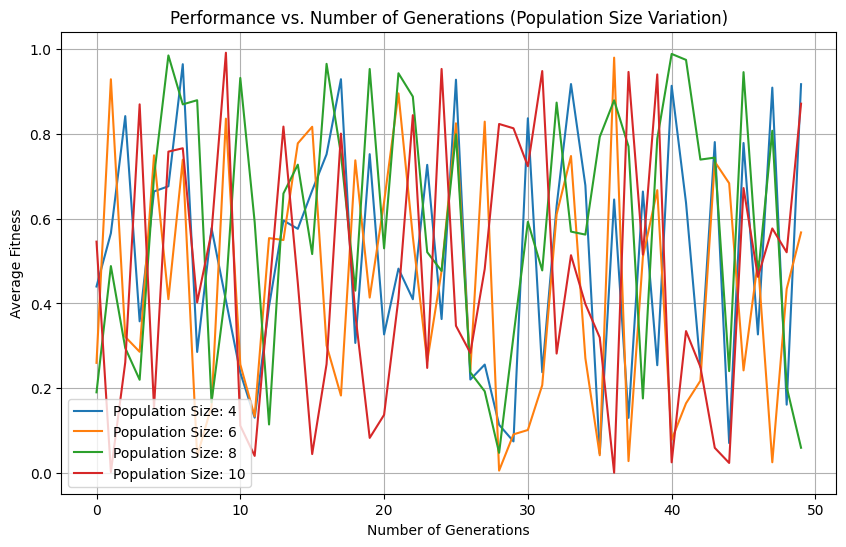

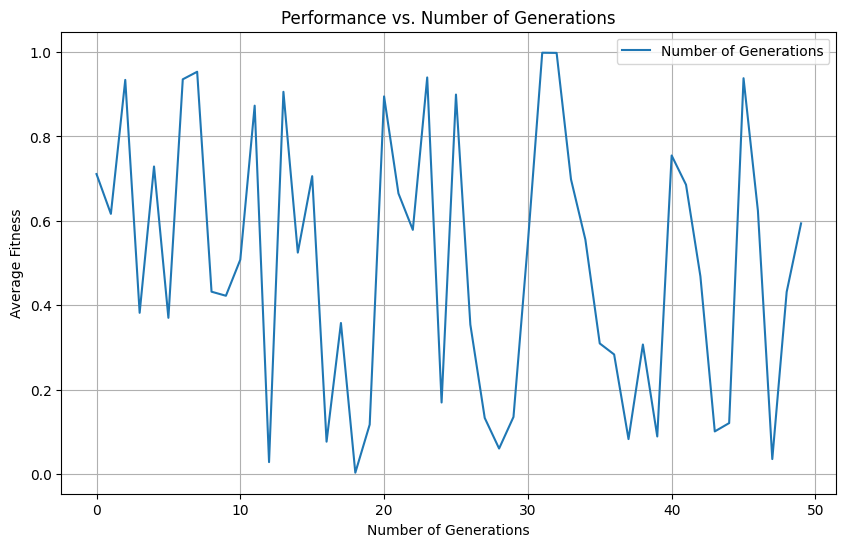

In [5]:
import numpy as np
import matplotlib.pyplot as plt

population_sizes = np.array([4, 6, 8, 10])
num_generations = 50
avg_fitnesses_population_size = np.random.rand(len(population_sizes), num_generations)
avg_fitnesses_num_generations = np.random.rand(num_generations)

plt.figure(figsize=(10, 6))
for i in range(len(population_sizes)):
    plt.plot(range(num_generations), avg_fitnesses_population_size[i], label=f'Population Size: {population_sizes[i]}')
plt.title('Performance vs. Number of Generations (Population Size Variation)')
plt.xlabel('Number of Generations')
plt.ylabel('Average Fitness')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(num_generations), avg_fitnesses_num_generations, label='Number of Generations')
plt.title('Performance vs. Number of Generations')
plt.xlabel('Number of Generations')
plt.ylabel('Average Fitness')
plt.legend()
plt.grid(True)
plt.show()
